In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample



In [39]:
# Load the dataset
df = pd.read_csv('/content/Anxiety Level in Healthcare Workers Dataset-2 - ML SHEET_PROJECT7.csv')
df

,Timestamp,Name,Gender,Martial Status,Age,Education,Role in healthcare workers,Working Hours,Location,Income,ANXIETY SCORE
0,11-13-2021 13:44:48,GUNDIKAYALA JYOSTHNA,1,1,1,7,4,0,2,2,3
1,11-13-2021 14:28:11,M SANDHYA RANI,1,1,1,7,4,0,2,1,5
2,11-13-2021 15:40:48,G. SAHITYA,1,1,1,7,4,0,2,1,20
3,11-14-2021 12:15:26,S.nagendra babu,0,1,1,3,2,0,2,1,11
4,11-16-2021 22:15:26,Manaswitha Bheemavarapu,1,1,1,6,6,2,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...
216,01-03-2022 20:08,Sravani,1,0,2,1,0,1,0,0,2
217,01-03-2022 20:09,Asma,1,0,1,2,5,1,0,0,4
218,01-03-2022 20:11,Krishna reddy,0,0,2,6,6,2,0,3,3
219,01-03-2022 20:13,sahastra,1,0,1,1,0,1,0,0,2


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Timestamp                   221 non-null    object
 1   Name                        221 non-null    object
 2   Gender                      221 non-null    int64 
 3   Martial Status              221 non-null    int64 
 4   Age                         221 non-null    int64 
 5   Education                   221 non-null    int64 
 6   Role in healthcare workers  221 non-null    int64 
 7   Working Hours               221 non-null    int64 
 8   Location                    221 non-null    int64 
 9   Income                      221 non-null    int64 
 10  ANXIETY SCORE               221 non-null    int64 
 11  Anxiety Level               221 non-null    object
dtypes: int64(9), object(3)
memory usage: 20.8+ KB


In [41]:
# Display the first few rows of the dataset
df.head()

,Timestamp,Name,Gender,Martial Status,Age,Education,Role in healthcare workers,Working Hours,Location,Income,ANXIETY SCORE
0,11-13-2021 13:44:48,GUNDIKAYALA JYOSTHNA,1,1,1,7,4,0,2,2,3
1,11-13-2021 14:28:11,M SANDHYA RANI,1,1,1,7,4,0,2,1,5
2,11-13-2021 15:40:48,G. SAHITYA,1,1,1,7,4,0,2,1,20
3,11-14-2021 12:15:26,S.nagendra babu,0,1,1,3,2,0,2,1,11
4,11-16-2021 22:15:26,Manaswitha Bheemavarapu,1,1,1,6,6,2,1,1,13


In [42]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print(df.isnull().sum())


Timestamp                     0
Name                          0
Gender                        0
Martial Status                0
Age                           0
Education                     0
Role in healthcare workers    0
Working Hours                 0
Location                      0
Income                        0
ANXIETY SCORE                 0
dtype: int64


In [43]:
# Handle missing values (if any)
df = df.dropna()  # Alternatively, you could use imputation methods

In [57]:
df

,Timestamp,Name,Gender,Martial Status,Age,Education,Role in healthcare workers,Working Hours,Location,Income,ANXIETY SCORE,Anxiety Level
0,11-13-2021 13:44:48,GUNDIKAYALA JYOSTHNA,1,1,1,7,4,0,2,2,3,Minimal anxiety
1,11-13-2021 14:28:11,M SANDHYA RANI,1,1,1,7,4,0,2,1,5,Mild anxiety
2,11-13-2021 15:40:48,G. SAHITYA,1,1,1,7,4,0,2,1,20,Severe anxiety
3,11-14-2021 12:15:26,S.nagendra babu,0,1,1,3,2,0,2,1,11,Moderate anxiety
4,11-16-2021 22:15:26,Manaswitha Bheemavarapu,1,1,1,6,6,2,1,1,13,Moderate anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...
216,01-03-2022 20:08,Sravani,1,0,2,1,0,1,0,0,2,Minimal anxiety
217,01-03-2022 20:09,Asma,1,0,1,2,5,1,0,0,4,Minimal anxiety
218,01-03-2022 20:11,Krishna reddy,0,0,2,6,6,2,0,3,3,Minimal anxiety
219,01-03-2022 20:13,sahastra,1,0,1,1,0,1,0,0,2,Minimal anxiety


In [44]:
# Convert AnxietyScore into Anxiety Level
def classify_anxiety(score):
    if score <= 4:
        return 'Minimal anxiety'
    elif score <= 9:
        return 'Mild anxiety'
    elif score <= 14:
        return 'Moderate anxiety'
    else:
        return 'Severe anxiety'

df['Anxiety Level'] = df['ANXIETY SCORE'].apply(classify_anxiety)

<ipython-input-45-afe66ef7aec9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anxiety Level', data=df ,palette='viridis')


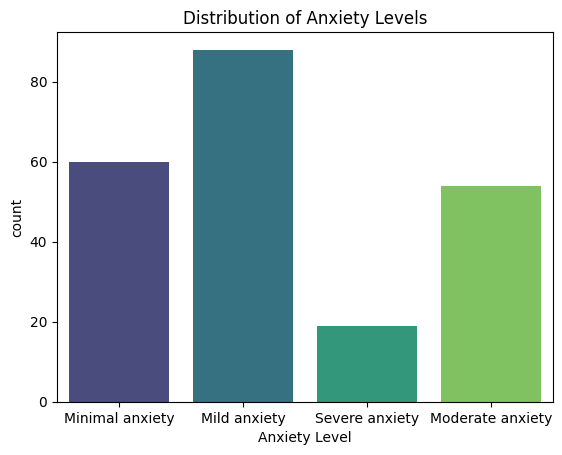

In [45]:
# Plot the distribution of anxiety levels
sns.countplot(x='Anxiety Level', data=df ,palette='viridis')
plt.title('Distribution of Anxiety Levels')
plt.show()

In [46]:
# Handling Data Imbalance
# Print the count of each anxiety level
print("Original class distribution:")
print(df['Anxiety Level'].value_counts())


Original class distribution:
Anxiety Level
Mild anxiety        88
Minimal anxiety     60
Moderate anxiety    54
Severe anxiety      19
Name: count, dtype: int64


In [47]:
# Split data by anxiety level
groups = df.groupby('Anxiety Level')

In [58]:
df

,Timestamp,Name,Gender,Martial Status,Age,Education,Role in healthcare workers,Working Hours,Location,Income,ANXIETY SCORE,Anxiety Level
0,11-13-2021 13:44:48,GUNDIKAYALA JYOSTHNA,1,1,1,7,4,0,2,2,3,Minimal anxiety
1,11-13-2021 14:28:11,M SANDHYA RANI,1,1,1,7,4,0,2,1,5,Mild anxiety
2,11-13-2021 15:40:48,G. SAHITYA,1,1,1,7,4,0,2,1,20,Severe anxiety
3,11-14-2021 12:15:26,S.nagendra babu,0,1,1,3,2,0,2,1,11,Moderate anxiety
4,11-16-2021 22:15:26,Manaswitha Bheemavarapu,1,1,1,6,6,2,1,1,13,Moderate anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...
216,01-03-2022 20:08,Sravani,1,0,2,1,0,1,0,0,2,Minimal anxiety
217,01-03-2022 20:09,Asma,1,0,1,2,5,1,0,0,4,Minimal anxiety
218,01-03-2022 20:11,Krishna reddy,0,0,2,6,6,2,0,3,3,Minimal anxiety
219,01-03-2022 20:13,sahastra,1,0,1,1,0,1,0,0,2,Minimal anxiety


In [48]:
# Find the size of the largest group
max_size = groups.size().max()

# Upsample all groups to match the size of the largest group
df_balanced = pd.concat([
    resample(group, replace=True, n_samples=max_size, random_state=42)
    for name, group in groups
])

<ipython-input-49-f9ea0977f7f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anxiety Level', data=df_balanced ,palette='viridis')


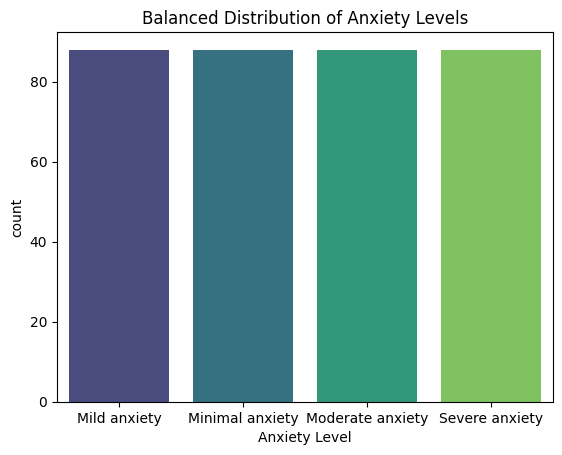

In [49]:
# Plot the balanced class distribution
sns.countplot(x='Anxiety Level', data=df_balanced ,palette='viridis')
plt.title('Balanced Distribution of Anxiety Levels')
plt.show()


In [50]:
# Feature Engineering and Preparation
# Assuming other features exist, encode categorical variables, and scale features
# Example: assuming 'Age' and 'Gender' are features
X = df_balanced.drop(['ANXIETY SCORE', 'Anxiety Level'], axis=1)
y = df_balanced['Anxiety Level']

In [51]:
# Encoding categorical variables if any
X = pd.get_dummies(X, drop_first=True)

In [52]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [53]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [54]:
# Model Training and Evaluation
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # Print accuracy separately
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

    print("-" * 50)


Model: RandomForest
                  precision    recall  f1-score   support

    Mild anxiety       0.70      0.78      0.74        18
 Minimal anxiety       0.79      0.88      0.83        17
Moderate anxiety       0.86      0.67      0.75        18
  Severe anxiety       1.00      1.00      1.00        18

        accuracy                           0.83        71
       macro avg       0.84      0.83      0.83        71
    weighted avg       0.84      0.83      0.83        71

[[14  2  2  0]
 [ 2 15  0  0]
 [ 4  2 12  0]
 [ 0  0  0 18]]
Accuracy: 0.8310
--------------------------------------------------
Model: LogisticRegression
                  precision    recall  f1-score   support

    Mild anxiety       0.88      0.78      0.82        18
 Minimal anxiety       0.79      0.88      0.83        17
Moderate anxiety       1.00      0.67      0.80        18
  Severe anxiety       0.75      1.00      0.86        18

        accuracy                           0.83        71
       m

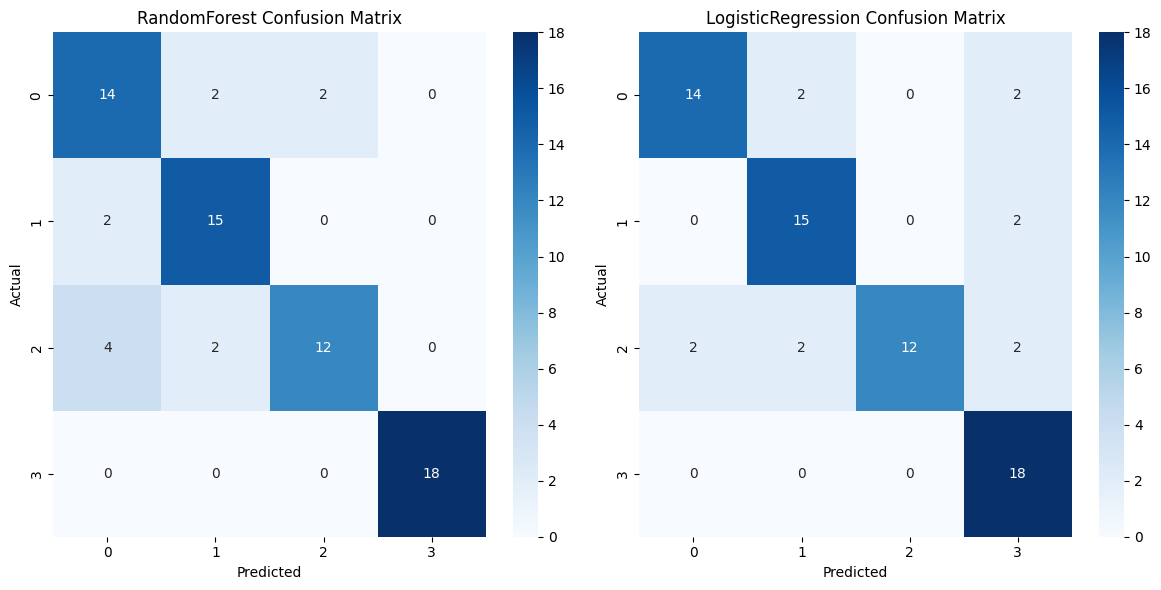

In [55]:
# Visualization of confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, (model_name, model) in enumerate(models.items()):
    ax = axes[i]
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()
